In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pre-process Data

In [2]:
# Import Alphabet Soup Charity dataset
charity_df = pd.read_csv("charity_data.csv")
charity_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Check datatypes
charity_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [4]:
# Count unique object values in each column
charity_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [5]:
# Count distinct values in "INCOME_AMT"
charity_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [6]:
# Cut and bin "ASK_AMOUNT" column
charity_df["ASK_AMT_BIN"] = pd.cut(charity_df["ASK_AMT"], 
                               bins=[0,
                                     100000,
                                     1000000,
                                     10000000,
                                     100000000,
                                     1000000000,
                                     10000000000]
                              )

In [7]:
# Count "ASK_AMT" bins
pd.value_counts(charity_df["ASK_AMT_BIN"])

(0, 100000]                  29768
(100000, 1000000]             2954
(1000000, 10000000]           1165
(10000000, 100000000]          311
(100000000, 1000000000]         83
(1000000000, 10000000000]       18
Name: ASK_AMT_BIN, dtype: int64

In [8]:
# Change "ASK_AMT" to object
charity_df.ASK_AMT_BIN = charity_df["ASK_AMT_BIN"].astype("object")

In [9]:
# "CLASSIFICATION" value counts
CLASSIFICATION_counts = charity_df.CLASSIFICATION.value_counts()
CLASSIFICATION_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1570        1
C3700        1
C4500        1
C1370        1
C1820        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [10]:
# Filter for "CLASSIFICATION_counts" values to replace
replace_CLASSIFICATION = list(CLASSIFICATION_counts[CLASSIFICATION_counts<1000].index)

In [11]:
# Bin above to "Other"
for CLASSIFICATION_counts in replace_CLASSIFICATION:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(CLASSIFICATION_counts, "Other")
    
# Check bin
charity_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# "APPLICATION_TYPE" value counts
APPLICATION_TYPE_counts = charity_df.APPLICATION_TYPE.value_counts()
APPLICATION_TYPE_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [13]:
# Filter for "APPLICATION_TYPE_counts" values to replace
replace_APPLICATION_TYPE = list(APPLICATION_TYPE_counts[APPLICATION_TYPE_counts<500].index)

In [14]:
# Bin above to "Other"
for APPLICATION_TYPE_counts in replace_APPLICATION_TYPE:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(APPLICATION_TYPE_counts, "Other")
    
# Check bin
charity_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [15]:
# Create copy of "charity_df"
charity_df1 = charity_df
charity_df1

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,ASK_AMT_BIN
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,"(0, 100000]"
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,"(100000, 1000000]"
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,"(0, 100000]"
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,"(0, 100000]"
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,"(100000, 1000000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0,"(0, 100000]"
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,"(0, 100000]"
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0,"(0, 100000]"
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1,"(0, 100000]"


In [16]:
# Drop columns
charity_df1 = charity_df1.drop(columns=["EIN", "NAME", "ASK_AMT"])
charity_df1

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,ASK_AMT_BIN
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1,"(0, 100000]"
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1,"(100000, 1000000]"
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0,"(0, 100000]"
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1,"(0, 100000]"
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1,"(100000, 1000000]"
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,0,"(0, 100000]"
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,0,"(0, 100000]"
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,0,"(0, 100000]"
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,1,"(0, 100000]"


In [17]:
# Create "IS_SUCCESSFUL1" column
charity_df1.insert(0, "IS_SUCCESSFUL1", charity_df1.IS_SUCCESSFUL)

In [18]:
# Convert "IS_SUCCESSFUL1" column to str
charity_df1["IS_SUCCESSFUL1"] = charity_df1["IS_SUCCESSFUL1"].astype(str)

charity_df1["IS_SUCCESSFUL1"].dtypes

dtype('O')

In [19]:
# Convert "IS_SUCCESSFUL1" column values
charity_df1["IS_SUCCESSFUL1"] = charity_df1["IS_SUCCESSFUL1"].replace(
    ["0", "1"],["N", "Y"]
)

charity_df1  

,IS_SUCCESSFUL1,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,ASK_AMT_BIN
0,Y,T10,Independent,C1000,ProductDev,Association,1,0,N,1,"(0, 100000]"
1,Y,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1,"(100000, 1000000]"
2,N,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0,"(0, 100000]"
3,Y,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1,"(0, 100000]"
4,Y,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1,"(100000, 1000000]"
...,...,...,...,...,...,...,...,...,...,...,...
34294,N,T4,Independent,C1000,ProductDev,Association,1,0,N,0,"(0, 100000]"
34295,N,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,0,"(0, 100000]"
34296,N,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,0,"(0, 100000]"
34297,Y,T5,Independent,C3000,ProductDev,Association,1,0,N,1,"(0, 100000]"


In [20]:
# Drop "IS_SUCCESSFUL" column
charity_df1 = charity_df1.drop(columns=["IS_SUCCESSFUL"])
charity_df1

,IS_SUCCESSFUL1,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT_BIN
0,Y,T10,Independent,C1000,ProductDev,Association,1,0,N,"(0, 100000]"
1,Y,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,"(100000, 1000000]"
2,N,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,"(0, 100000]"
3,Y,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,"(0, 100000]"
4,Y,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,"(100000, 1000000]"
...,...,...,...,...,...,...,...,...,...,...
34294,N,T4,Independent,C1000,ProductDev,Association,1,0,N,"(0, 100000]"
34295,N,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,"(0, 100000]"
34296,N,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,"(0, 100000]"
34297,Y,T5,Independent,C3000,ProductDev,Association,1,0,N,"(0, 100000]"


In [21]:
# Create "STATUS1" column
charity_df1.insert(1, "STATUS1", charity_df1.STATUS)

In [22]:
# Convert "STATUS1" column to str
charity_df1["STATUS1"] = charity_df1["STATUS1"].astype(str)

charity_df1["STATUS1"].dtypes

dtype('O')

In [23]:
# Convert "STATUS1" column values
charity_df1["STATUS1"] = charity_df1["STATUS1"].replace(
    ["0", "1"],["Not Active", "Active"]
)

charity_df1

,IS_SUCCESSFUL1,STATUS1,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT_BIN
0,Y,Active,T10,Independent,C1000,ProductDev,Association,1,0,N,"(0, 100000]"
1,Y,Active,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,"(100000, 1000000]"
2,N,Active,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,"(0, 100000]"
3,Y,Active,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,"(0, 100000]"
4,Y,Active,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,"(100000, 1000000]"
...,...,...,...,...,...,...,...,...,...,...,...
34294,N,Active,T4,Independent,C1000,ProductDev,Association,1,0,N,"(0, 100000]"
34295,N,Active,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,"(0, 100000]"
34296,N,Active,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,"(0, 100000]"
34297,Y,Active,T5,Independent,C3000,ProductDev,Association,1,0,N,"(0, 100000]"


In [24]:
# Drop "STATUS" column
charity_df1 = charity_df1.drop(columns=["STATUS"])
charity_df1

,IS_SUCCESSFUL1,STATUS1,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT_BIN
0,Y,Active,T10,Independent,C1000,ProductDev,Association,0,N,"(0, 100000]"
1,Y,Active,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,"(100000, 1000000]"
2,N,Active,T5,CompanySponsored,C3000,ProductDev,Association,0,N,"(0, 100000]"
3,Y,Active,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,"(0, 100000]"
4,Y,Active,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,"(100000, 1000000]"
...,...,...,...,...,...,...,...,...,...,...
34294,N,Active,T4,Independent,C1000,ProductDev,Association,0,N,"(0, 100000]"
34295,N,Active,T4,CompanySponsored,C3000,ProductDev,Association,0,N,"(0, 100000]"
34296,N,Active,T3,CompanySponsored,C2000,Preservation,Association,0,N,"(0, 100000]"
34297,Y,Active,T5,Independent,C3000,ProductDev,Association,0,N,"(0, 100000]"


In [25]:
# Check datatypes
charity_df1.dtypes

IS_SUCCESSFUL1            object
STATUS1                   object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT_BIN               object
dtype: object

In [26]:
# Generate categorical variable list and count unique object values in each column
charity_df1_cat = charity_df1.dtypes[charity_df1.dtypes == "object"].index.tolist()
charity_df1[charity_df1_cat].nunique()

IS_SUCCESSFUL1            2
STATUS1                   2
APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
ASK_AMT_BIN               6
dtype: int64

In [27]:
# Create a OneHotEncoder instance
One_Hot_Encoder = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using categorical variable list
One_Hot_Encoder_df = pd.DataFrame(One_Hot_Encoder.fit_transform(charity_df1[charity_df1_cat]))

# Add the encoded variable names to DataFrame
One_Hot_Encoder_df.columns = One_Hot_Encoder.get_feature_names(charity_df1_cat)
One_Hot_Encoder_df

,IS_SUCCESSFUL1_N,IS_SUCCESSFUL1_Y,STATUS1_Active,STATUS1_Not Active,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,"ASK_AMT_BIN_(0, 100000]","ASK_AMT_BIN_(100000, 1000000]","ASK_AMT_BIN_(1000000, 10000000]","ASK_AMT_BIN_(10000000, 100000000]","ASK_AMT_BIN_(100000000, 1000000000]","ASK_AMT_BIN_(1000000000, 10000000000]"
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34295,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34296,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34297,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Merge one-hot encoded features and drop originals
charity_df1 = charity_df1.merge(One_Hot_Encoder_df, left_index=True, right_index=True)
charity_df1 = charity_df1.drop(charity_df1_cat,1)
charity_df1

,IS_SUCCESSFUL1_N,IS_SUCCESSFUL1_Y,STATUS1_Active,STATUS1_Not Active,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,"ASK_AMT_BIN_(0, 100000]","ASK_AMT_BIN_(100000, 1000000]","ASK_AMT_BIN_(1000000, 10000000]","ASK_AMT_BIN_(10000000, 100000000]","ASK_AMT_BIN_(100000000, 1000000000]","ASK_AMT_BIN_(1000000000, 10000000000]"
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34295,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34296,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34297,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Split into features and target arrays
y = charity_df1["IS_SUCCESSFUL1_Y"].values
X = charity_df1.drop(["IS_SUCCESSFUL1_Y","IS_SUCCESSFUL1_N"],1).values

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
# Create StandardScaler instance
scaler = StandardScaler()

# Fit StandardScaler
X_scaler = scaler.fit(X_train)

# Scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train: Neural Network / Keras model

In [31]:
# Define Keras model
neural_network_model = tf.keras.models.Sequential()

# Layers
num_input_features = len(X_train_scaled[0])
neural_network_model.add(Dense(100, input_dim=num_input_features, activation="relu"))
neural_network_model.add(Dense(50, activation="relu"))
neural_network_model.add(Dense(1, activation="sigmoid"))

neural_network_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               5000      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,101
Trainable params: 10,101
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile Sequential model
neural_network_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model = neural_network_model.fit(X_train_scaled, y_train, epochs=300)

Epoch 1/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5687 - accuracy: 0.7225
Epoch 2/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7308
Epoch 3/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5514 - accuracy: 0.7307
Epoch 4/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5494 - accuracy: 0.7312
Epoch 5/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5475 - accuracy: 0.7326
Epoch 6/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5464 - accuracy: 0.7331
Epoch 7/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5452 - accuracy: 0.7335
Epoch 8/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5444 - accuracy: 0.7344
Epoch 9/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5441 - accuracy: 0.7346
Epoch 10/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5431 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5296 - accuracy: 0.7431
Epoch 82/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5285 - accuracy: 0.7434
Epoch 83/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5287 - accuracy: 0.7426
Epoch 84/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5288 - accuracy: 0.7427
Epoch 85/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5289 - accuracy: 0.7426
Epoch 86/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5291 - accuracy: 0.7432
Epoch 87/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5285 - accuracy: 0.7429
Epoch 88/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5287 - accuracy: 0.7429
Epoch 89/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7439
Epoch 90/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5286 - accuracy: 

804/804 [==============================] - 1s 2ms/step - loss: 0.5251 - accuracy: 0.7446
Epoch 161/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5266 - accuracy: 0.7446
Epoch 162/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5260 - accuracy: 0.7447
Epoch 163/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5251 - accuracy: 0.7444
Epoch 164/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5253 - accuracy: 0.7447
Epoch 165/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5260 - accuracy: 0.7439
Epoch 166/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5259 - accuracy: 0.7448
Epoch 167/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5254 - accuracy: 0.7447
Epoch 168/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5253 - accuracy: 0.7450
Epoch 169/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5273 - a

804/804 [==============================] - 1s 1ms/step - loss: 0.5251 - accuracy: 0.7445
Epoch 240/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5245 - accuracy: 0.7453
Epoch 241/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5252 - accuracy: 0.7449
Epoch 242/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5249 - accuracy: 0.7450
Epoch 243/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5254 - accuracy: 0.7448
Epoch 244/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5250 - accuracy: 0.7449
Epoch 245/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5245 - accuracy: 0.7451
Epoch 246/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5246 - accuracy: 0.7450
Epoch 247/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5239 - accuracy: 0.7446
Epoch 248/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5246 - a

In [33]:
# Data history
print(model.history.keys())

dict_keys(['loss', 'accuracy'])


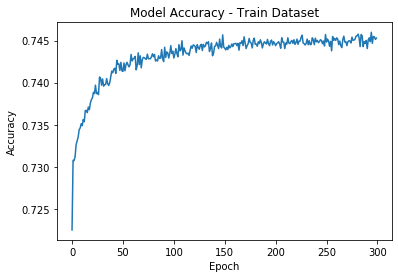

In [34]:
# Graph model accuracy
plt.plot(model.history["accuracy"])
plt.title("Model Accuracy - Train Dataset")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

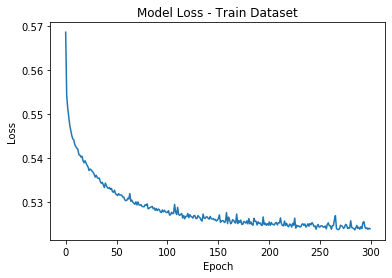

In [35]:
# Graph model loss
plt.plot(model.history["loss"])
plt.title("Model Loss - Train Dataset")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

# Test: Neural Network / Keras model

In [36]:
# Define Keras model
neural_network_model = tf.keras.models.Sequential()

# Layers
num_input_features = len(X_test_scaled[0])
neural_network_model.add(Dense(100, input_dim=num_input_features, activation="relu"))
neural_network_model.add(Dense(50, activation="relu"))
neural_network_model.add(Dense(1, activation="sigmoid"))

neural_network_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               5000      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 10,101
Trainable params: 10,101
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile Sequential model
neural_network_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model = neural_network_model.fit(X_test_scaled, y_test, epochs=300)

Epoch 1/300
268/268 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.7074
Epoch 2/300
268/268 [==============================] - 0s 2ms/step - loss: 0.5588 - accuracy: 0.7294
Epoch 3/300
268/268 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.7342
Epoch 4/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5508 - accuracy: 0.7336
Epoch 5/300
268/268 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.7348
Epoch 6/300
268/268 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.7366
Epoch 7/300
268/268 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.7375
Epoch 8/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5444 - accuracy: 0.7377
Epoch 9/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5433 - accuracy: 0.7390
Epoch 10/300
268/268 [==============================] - 0s 2ms/step - loss: 0.5419 - accura

Epoch 81/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5212 - accuracy: 0.7508
Epoch 82/300
268/268 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.7511
Epoch 83/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.7501
Epoch 84/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5211 - accuracy: 0.7525
Epoch 85/300
268/268 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7514
Epoch 86/300
268/268 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.7506
Epoch 87/300
268/268 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.7504
Epoch 88/300
268/268 [==============================] - ETA: 0s - loss: 0.5203 - accuracy: 0.75 - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7520
Epoch 89/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7514
Epoch 90/300
268/268 [==================

268/268 [==============================] - 1s 2ms/step - loss: 0.5155 - accuracy: 0.7528
Epoch 160/300
268/268 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.7510
Epoch 161/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5154 - accuracy: 0.7515
Epoch 162/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5153 - accuracy: 0.7518
Epoch 163/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5153 - accuracy: 0.7511
Epoch 164/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5159 - accuracy: 0.7527
Epoch 165/300
268/268 [==============================] - 0s 2ms/step - loss: 0.5150 - accuracy: 0.7521
Epoch 166/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5158 - accuracy: 0.7518
Epoch 167/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.7511
Epoch 168/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5151 - a

268/268 [==============================] - 0s 1ms/step - loss: 0.5125 - accuracy: 0.7523
Epoch 238/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5131 - accuracy: 0.7532
Epoch 239/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5162 - accuracy: 0.7535
Epoch 240/300
268/268 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.7520
Epoch 241/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.7528
Epoch 242/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5127 - accuracy: 0.7536
Epoch 243/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.7528
Epoch 244/300
268/268 [==============================] - 0s 1ms/step - loss: 0.5129 - accuracy: 0.7530
Epoch 245/300
268/268 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.7541
Epoch 246/300
268/268 [==============================] - 0s 2ms/step - loss: 0.5132 - a

In [38]:
# Data history
print(model.history.keys())

dict_keys(['loss', 'accuracy'])


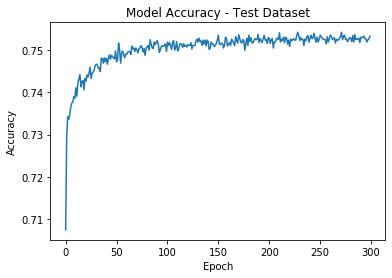

In [39]:
# Graph model accuracy
plt.plot(model.history["accuracy"])
plt.title("Model Accuracy - Test Dataset")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

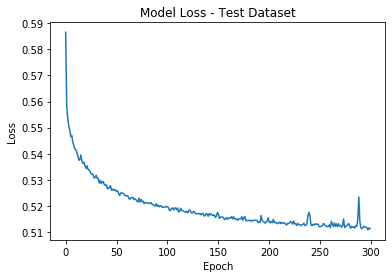

In [40]:
# Graph model loss
plt.plot(model.history["loss"])
plt.title("Model Loss - Test Dataset")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()